<a href="https://colab.research.google.com/github/Data-pageup/deep-learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data: (50000, 32, 32, 3)
Testing data : (10000, 32, 32, 3)
Unique classes: 10


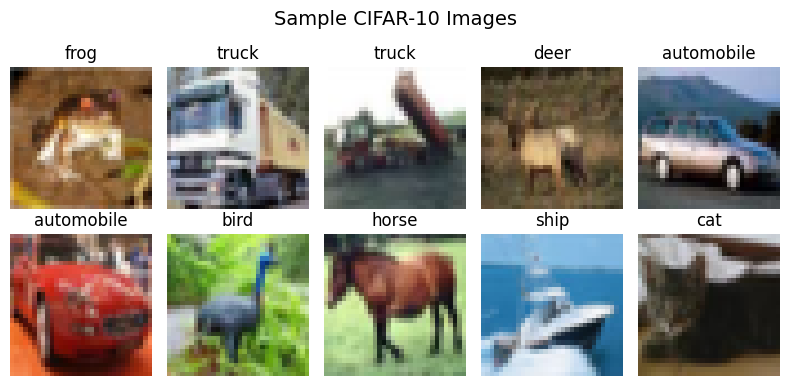

✅ Data ready for CNN model (normalized & one-hot encoded).


In [ ]:
# ====== BATCH 1: CIFAR-10 DATA LOADING & PREPROCESSING ======
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# --- 1. Load the dataset ---
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Training data:", X_train.shape)
print("Testing data :", X_test.shape)
print("Unique classes:", len(set(y_train.flatten())))

# --- 2. Normalize pixel values (0–255 → 0–1) ---
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

# --- 3. One-hot encode labels ---
y_train = to_categorical(y_train, num_classes=10)
y_test  = to_categorical(y_test, num_classes=10)

# --- 4. Class names for reference ---
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# --- 5. Visualize a few training images ---
plt.figure(figsize=(8,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[int(tf.argmax(y_train[i]))])
    plt.axis('off')
plt.suptitle('Sample CIFAR-10 Images', fontsize=14)
plt.tight_layout()
plt.show()

print("✅ Data ready for CNN model (normalized & one-hot encoded).")


In [ ]:
# ====== BATCH 2: CNN ARCHITECTURE (CIFAR-10) ======
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten,
                                     Dropout, BatchNormalization)

# Define the CNN model exactly as per lab instructions
model = Sequential([
    # --- Block 1 ---
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    # --- Block 2 ---
    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    # --- Block 3 ---
    Conv2D(128, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    # --- Fully Connected Layers ---
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')   # 10 classes for CIFAR-10
])

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Show model summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,148,362 (4.38 MB)

 Trainable params: 1,147,914 (4.38 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 201s 257ms/step - accuracy: 0.3716 - loss: 1.7526 - val_accuracy: 0.5272 - val_loss: 1.3148
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 181s 232ms/step - accuracy: 0.5301 - loss: 1.3225 - val_accuracy: 0.6326 - val_loss: 1.0463
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 206s 263ms/step - accuracy: 0.6082 - loss: 1.1251 - val_accuracy: 0.6606 - val_loss: 1.0095
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 208s 266ms/step - accuracy: 0.6453 - loss: 1.0067 - val_accuracy: 0.6973 - val_loss: 0.8606
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 232s 227ms/step - accuracy: 0.6738 - loss: 0.9363 - val_accuracy: 0.7206 - val_loss: 0.8072

✅ Test Accuracy: 72.06%
Test Loss: 0.8072


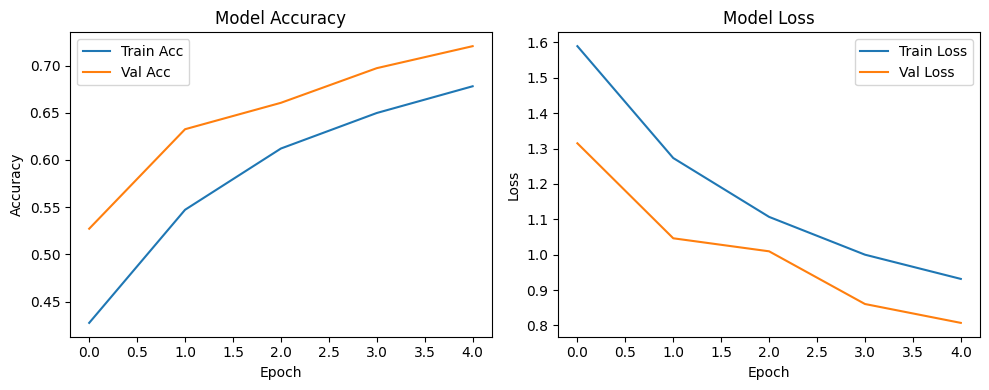

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step


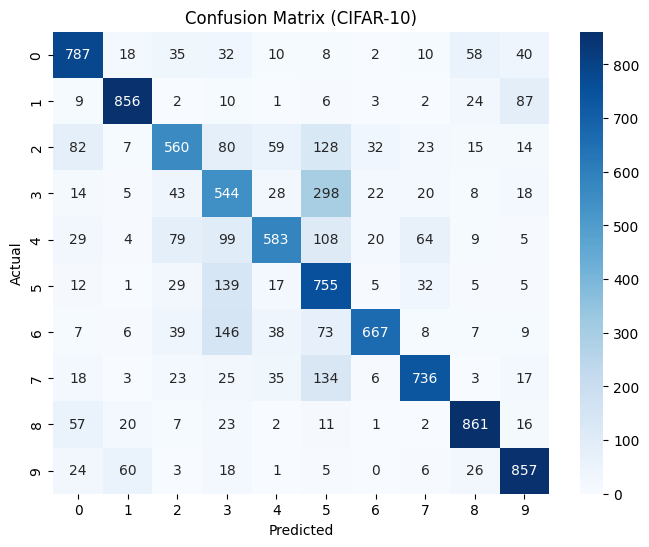


Classification Report:
              precision    recall  f1-score   support

    airplane       0.76      0.79      0.77      1000
  automobile       0.87      0.86      0.86      1000
        bird       0.68      0.56      0.62      1000
         cat       0.49      0.54      0.51      1000
        deer       0.75      0.58      0.66      1000
         dog       0.49      0.76      0.60      1000
        frog       0.88      0.67      0.76      1000
       horse       0.82      0.74      0.77      1000
        ship       0.85      0.86      0.85      1000
       truck       0.80      0.86      0.83      1000

    accuracy                           0.72     10000
   macro avg       0.74      0.72      0.72     10000
weighted avg       0.74      0.72      0.72     10000



In [ ]:
# ====== BATCH 3: TRAINING & EVALUATION (CIFAR-10) ======
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# --- 1. Training ---
EPOCHS = 5
BATCH_SIZE = 64

history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    verbose=1
)

# --- 2. Evaluate model on test set ---
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# --- 3. Plot training/validation accuracy & loss ---
plt.figure(figsize=(10,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# --- 4. Confusion Matrix & Per-class Metrics ---
# Convert one-hot labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(X_test), axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (CIFAR-10)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --- 5. Per-class precision & recall ---
target_names = ['airplane','automobile','bird','cat','deer',
                'dog','frog','horse','ship','truck']
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=target_names))
